In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from scipy.stats import norm
from tabulate import tabulate

In [2]:
tickers = ['TSLA', 'XOM', 'JNJ', 'PG', 'ABBV', 'ALB', 'AMZN', 'BA', 'UNH', 'DEO']
prices_df = DataReader(tickers, 'yahoo', '2017-01-01', '2022-11-20')['Adj Close']
print(prices_df.tail())

Symbols           TSLA         XOM         JNJ          PG        ABBV  \
Date                                                                     
2022-11-14  190.949997  113.370003  170.807510  140.979996  151.740005   
2022-11-15  194.419998  114.129997  171.284439  140.490005  153.039993   
2022-11-16  186.919998  112.910004  172.347580  141.740005  151.869995   
2022-11-17  183.169998  113.059998  173.738602  140.869995  152.160004   
2022-11-18  180.190002  112.080002  175.069992  142.570007  154.979996   

Symbols            ALB       AMZN          BA         UNH         DEO  
Date                                                                   
2022-11-14  316.350006  98.489998  173.550003  513.750000  173.110001  
2022-11-15  295.859985  98.940002  175.350006  503.010010  173.660004  
2022-11-16  286.769989  97.120003  172.690002  511.519989  175.520004  
2022-11-17  277.450012  94.849998  172.779999  515.309998  175.539993  
2022-11-18  276.980011  94.139999  173.889999  53

In [3]:
returns_df = prices_df.pct_change()[1:]
print(returns_df.tail())

Symbols         TSLA       XOM       JNJ        PG      ABBV       ALB  \
Date                                                                     
2022-11-14 -0.025616  0.002919  0.015716  0.000071  0.010522 -0.027752   
2022-11-15  0.018172  0.006704  0.002792 -0.003476  0.008567 -0.064770   
2022-11-16 -0.038576 -0.010690  0.006207  0.008897 -0.007645 -0.030724   
2022-11-17 -0.020062  0.001328  0.008071 -0.006138  0.001910 -0.032500   
2022-11-18 -0.016269 -0.008668  0.007663  0.012068  0.018533 -0.001694   

Symbols         AMZN        BA       UNH       DEO  
Date                                                
2022-11-14 -0.022820 -0.022198 -0.015955 -0.004600  
2022-11-15  0.004569  0.010372 -0.020905  0.003177  
2022-11-16 -0.018395 -0.015170  0.016918  0.010711  
2022-11-17 -0.023373  0.000521  0.007409  0.000114  
2022-11-18 -0.007485  0.006424  0.028507  0.011906  


In [4]:
stocks_weights = [0.10, 0.05, 0.10, 0.30, 0.05, 0.10, 0.10, 0.05, 0.10, 0.05]
print(sum(stocks_weights))

1.0


In [5]:
weighted_returns = returns_df * stocks_weights
print(weighted_returns.tail())

Symbols         TSLA       XOM       JNJ        PG      ABBV       ALB  \
Date                                                                     
2022-11-14 -0.002562  0.000146  0.001572  0.000021  0.000526 -0.002775   
2022-11-15  0.001817  0.000335  0.000279 -0.001043  0.000428 -0.006477   
2022-11-16 -0.003858 -0.000534  0.000621  0.002669 -0.000382 -0.003072   
2022-11-17 -0.002006  0.000066  0.000807 -0.001841  0.000095 -0.003250   
2022-11-18 -0.001627 -0.000433  0.000766  0.003620  0.000927 -0.000169   

Symbols         AMZN        BA       UNH       DEO  
Date                                                
2022-11-14 -0.002282 -0.001110 -0.001596 -0.000230  
2022-11-15  0.000457  0.000519 -0.002091  0.000159  
2022-11-16 -0.001839 -0.000758  0.001692  0.000536  
2022-11-17 -0.002337  0.000026  0.000741  0.000006  
2022-11-18 -0.000749  0.000321  0.002851  0.000595  


In [6]:
portfolio_returns = weighted_returns.sum(axis=1)
print(portfolio_returns.tail())

Date
2022-11-14   -0.008289
2022-11-15   -0.005616
2022-11-16   -0.004927
2022-11-17   -0.007693
2022-11-18    0.006102
dtype: float64


In [7]:
losses = - portfolio_returns

In [8]:
VaR_95 = np.quantile(losses, 0.95)
print(VaR_95)

0.017197229048835295


# Historical VaR

In [9]:
portfolio_returns.sort_values(inplace=True, ascending=True)

In [10]:
VaR_90 =  portfolio_returns.quantile(0.1)
VaR_95 =  portfolio_returns.quantile(0.05)
VaR_99 =  portfolio_returns.quantile(0.01)
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0111722
95%                      -0.0171972
99%                      -0.0374105


# CVaR

In [11]:
mean = np.mean(portfolio_returns)
std = np.std(portfolio_returns)

In [12]:
tail_loss_90 = norm.expect(lambda x: x, loc = mean, scale = std, lb = VaR_90)
CVaR_90 = - (1 / (1 - 0.90)) * tail_loss_90

tail_loss_95 = norm.expect(lambda x: x, loc = mean, scale = std, lb = VaR_95)
CVaR_95 = - (1 / (1 - 0.95)) * tail_loss_95

tail_loss_99 = norm.expect(lambda x: x, loc = mean, scale = std, lb = VaR_99)
CVaR_99 = - (1 / (1 - 0.99)) * tail_loss_99

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk']))

Confidence Level      Conditional Value at Risk
------------------  ---------------------------
90%                                  -0.0383703
95%                                  -0.0508905
99%                                  -0.0936086


In [13]:
sorted_rets = sorted(portfolio_returns)

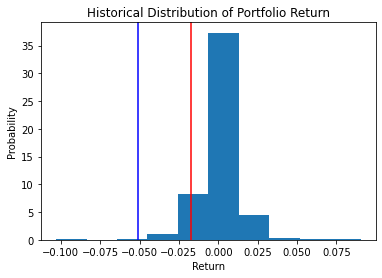

In [14]:
plt.hist(sorted_rets, density=True, stacked=True)
plt.xlabel('Return')
plt.ylabel('Probability')
plt.title('Historical Distribution of Portfolio Return')
plt.axvline(x=VaR_95, color='r', linestyle='-', label='VaR 95: {0:.2f}%'.format(VaR_95))
plt.axvline(x=CVaR_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(CVaR_95))
plt.show()